The following libraries are installed for data analysis and modeling:

Pandas: Facilitates data manipulation and preprocessing.

Scikit-Learn: Provides machine learning algorithms and evaluation tools.

Matplotlib: Supports basic data visualization.

Seaborn: Enhances statistical plotting for clear data insights.

These tools are essential for efficient data handling, model building, and visualization

In [ ]:
pip install pandas scikit-learn matplotlib seaborn

The code imports necessary libraries for data handling and file uploads within Google Colab:

Pandas: Facilitates efficient data manipulation and analysis.

Google Colab File Uploads: Enables manual uploading of files from a local system.

This script then uploads two datasets, one containing weather data (Chennai_1990_2022_Madras.csv) and another with commodity price data (FAOSTAT_data_en_10-5-2024.csv).

These datasets are read into Pandas DataFrames for further analysis.

In [ ]:
# Import necessary libraries
import pandas as pd
from google.colab import files

# Step 1: Upload the datasets
uploaded = files.upload()
uploaded = files.upload()
# Load the datasets
weather_df = pd.read_csv('Chennai_1990_2022_Madras.csv')
price_df = pd.read_csv('FAOSTAT_data_en_10-5-2024.csv')

This section of code provides functionality for examining dataset columns and identifying shared columns between two data sources:

print_columns(df, df_name): A helper function that outputs the columns of a specified DataFrame in a clear, indexed format, aiding in dataset structure review.

print_common_columns(df1, df2, df1_name, df2_name): Identifies and displays common columns between two DataFrames. This allows for easy identification of shared features, essential for data merging or comparative analysis.

In [ ]:
# Step 2: Check the columns, print in a readable format, and find common columns
def print_columns(df, df_name):
    print(f"\n{df_name} Columns:")
    for i, col in enumerate(df.columns, 1):
        print(f"{i}. {col}")

# Function to find and print common columns
def print_common_columns(df1, df2, df1_name, df2_name):
    common_cols = set(df1.columns).intersection(set(df2.columns))
    print(f"\nCommon Columns between {df1_name} and {df2_name}:")
    if common_cols:
        for i, col in enumerate(common_cols, 1):
            print(f"{i}. {col}")
    else:
        print("No common columns found.")

# Print the columns of both datasets
print_columns(weather_df, "Weather Data")
print_columns(price_df, "FAOSTAT Price Data")

# Print common columns
print_common_columns(weather_df, price_df, "Weather Data", "FAOSTAT Price Data")



Weather Data Columns:
1. time
2. tavg
3. tmin
4. tmax
5. prcp
6. Year

FAOSTAT Price Data Columns:
1. Domain Code
2. Domain
3. Area Code (M49)
4. Area
5. Element Code
6. Element
7. Item Code (CPC)
8. Item
9. Year Code
10. Year
11. Months Code
12. Months
13. Unit
14. Value
15. Flag
16. Flag Description

Common Columns between Weather Data and FAOSTAT Price Data:
1. Year


This code integrates two datasets, aligning weather and price data by year:

Data Loading: Reads weather and commodity price data into separate Pandas DataFrames.

Year Extraction: Converts the time column in the weather dataset to a datetime format and extracts the Year, enabling temporal alignment between datasets.

Data Merging: Merges the price and weather datasets on the Year column, creating a unified dataset for further analysis.

Display: Presents the first few rows of the merged dataset in a structured, tabular format using the tabulate library, enhancing readability.



In [ ]:
import pandas as pd
from tabulate import tabulate

# Load the datasets
weather_df = pd.read_csv('Chennai_1990_2022_Madras.csv')
price_df = pd.read_csv('FAOSTAT_data_en_10-5-2024.csv')

# Extract year from the existing 'time' column
weather_df['Year'] = pd.to_datetime(weather_df['time'], format='%d-%m-%Y').dt.year

# Merge the datasets on the 'Year' column
merged_df = pd.merge(price_df, weather_df, on='Year')

# Display the first few rows of the merged dataset in a tabular format
print("Merged Dataset:")
print(tabulate(merged_df.head(), headers='keys', tablefmt='pretty'))


Merged Dataset:
+---+-------------+-----------------+-----------------+-------+--------------+----------------------------------------+-----------------+---------------------------------------------------------------------------+-----------+------+-------------+--------------+------+--------+------+------------------+------------+------+------+------+------+
|   | Domain Code |     Domain      | Area Code (M49) | Area  | Element Code |                Element                 | Item Code (CPC) |                                   Item                                    | Year Code | Year | Months Code |    Months    | Unit | Value  | Flag | Flag Description |    time    | tavg | tmin | tmax | prcp |
+---+-------------+-----------------+-----------------+-------+--------------+----------------------------------------+-----------------+---------------------------------------------------------------------------+-----------+------+-------------+--------------+------+--------+------+----------

This code segment processes and merges weather and commodity price data, then filters for a specific timeframe:

Data Loading: Imports the weather and price datasets into separate Pandas DataFrames.

Year Extraction: Extracts the year from the time column in the weather data to facilitate merging.

Data Merging: Aligns the datasets by merging on the Year column, integrating weather and price data for combined analysis.

Data Filtering: Filters the merged dataset to retain data from 2013 to 2022, defining a training dataset for this period.

Display and Storage: Displays the filtered training dataset in a clear tabular format and saves the complete merged dataset as merged_dataset.csv for future use.

In [ ]:
import pandas as pd
from tabulate import tabulate

# Load the datasets
weather_df = pd.read_csv('Chennai_1990_2022_Madras.csv')
price_df = pd.read_csv('FAOSTAT_data_en_10-5-2024.csv')

# Extract year from the existing 'time' column
weather_df['Year'] = pd.to_datetime(weather_df['time'], format='%d-%m-%Y').dt.year

# Merge the datasets on the 'Year' column
merged_df = pd.merge(price_df, weather_df, on='Year')

# Step 5: Filter the dataset for years 2013 to 2022
train_data = merged_df[(merged_df['Year'] >= 2013) & (merged_df['Year'] <= 2022)]

# Display the filtered dataset in a tabular format
print("Filtered Training Data (2013-2022):")
print(tabulate(train_data.head(), headers='keys', tablefmt='pretty'))

# Optionally, save the merged dataset to a CSV file
merged_df.to_csv('merged_dataset.csv', index=False)


Filtered Training Data (2013-2022):
+---+-------------+-----------------+-----------------+-------+--------------+----------------------------------------+-----------------+---------------------------------------------------------------------------+-----------+------+-------------+--------------+------+--------+------+------------------+------------+------+------+------+------+
|   | Domain Code |     Domain      | Area Code (M49) | Area  | Element Code |                Element                 | Item Code (CPC) |                                   Item                                    | Year Code | Year | Months Code |    Months    | Unit | Value  | Flag | Flag Description |    time    | tavg | tmin | tmax | prcp |
+---+-------------+-----------------+-----------------+-------+--------------+----------------------------------------+-----------------+---------------------------------------------------------------------------+-----------+------+-------------+--------------+------+------

This section builds a machine learning model to predict price indices based on historical weather data:

Data Preparation: Filters the merged dataset for the years 2013–2022, defining X_train with weather variables (tavg, tmin, tmax, prcp) and y_train as the price index (Value).

Train-Validation Split: Splits the training data into training (80%) and validation (20%) sets to assess model performance.

Model Training: Initializes a Random Forest Regressor with 100 trees and trains it on the training subset.

Model Validation: Predicts on the validation set and computes the Mean Squared Error (MSE) to evaluate model accuracy.

2024 Price Prediction: Using expected average weather conditions for 2024, the model predicts the commodity price index for that year.

This approach effectively uses weather data to forecast future price indices, contributing to dynamic pricing models in economic analysis.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming merged_df is your merged dataset with the necessary columns

# Filter the dataset for years 2013 to 2022
train_data = merged_df[(merged_df['Year'] >= 2013) & (merged_df['Year'] <= 2022)]

# Define the features (weather data) and target variable (price index)
X_train = train_data[['tavg', 'tmin', 'tmax', 'prcp']]
y_train = train_data['Value']

# Split the data into training and validation sets (80% train, 20% validation)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_split, y_train_split)

# Validate the model
y_val_pred = model.predict(X_val_split)
mse = mean_squared_error(y_val_split, y_val_pred)

print(f'Mean Squared Error (Validation): {mse:.2f}')

# Prepare to predict prices for 2024 based on expected weather conditions
# Example average weather conditions for 2024
weather_2024_avg = {
    'tavg': [29.06],
    'tmin': [26.63],
    'tmax': [31.48],
    'prcp': [116.42]
}
weather_2024_df = pd.DataFrame(weather_2024_avg)

# Predict the price for 2024
predicted_price_2024 = model.predict(weather_2024_df)

print(f'Predicted Price for 2024: {predicted_price_2024[0]:.2f}')


Mean Squared Error (Validation): 38.49
Predicted Price for 2024: 113.77


This code segment focuses on loading a previously merged dataset and extracting unique ingredients:

Data Loading: The merged dataset is read from a CSV file (merged_dataset.csv), which contains integrated weather and price data.

Unique Ingredients Extraction: The code retrieves a list of unique ingredients from the Item column of the dataset, facilitating further analysis of distinct commodities available for study.

This step is crucial for understanding the diversity of items in the dataset, which can inform subsequent data processing or modeling activities.

In [ ]:
import pandas as pd

# Load your merged dataset
merged_df = pd.read_csv('merged_dataset.csv')

# List of unique ingredients
ingredients = merged_df['Item'].unique()


<ipython-input-8-345f20c8ca8e>:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('merged_dataset.csv')


This segment of code trains individual Random Forest Regressor models for each unique ingredient to predict their prices for 2024 based on weather data:

Model Initialization: Initializes an empty list to store predictions for each ingredient.

Looping Through Ingredients: Iterates over each unique ingredient in the dataset:

Data Filtering: Extracts data specific to the current ingredient from the merged dataset.
Feature Selection: Identifies relevant weather features (tavg, tmin, tmax, prcp) and the target variable (Value).
Handling Missing Values: Drops any rows with missing target values to ensure model accuracy.
Train-Test Split: Divides the dataset into training (80%) and testing (20%) sets for model training and evaluation.
Model Training: Trains a Random Forest model on the training data.

Price Prediction: Uses average weather conditions for 2024 to predict the ingredient's price.

Storing Predictions: Collects the ingredient name and its predicted price into a structured list, which is then converted into a DataFrame.

Sorting Results: The predictions are sorted to identify which ingredients are expected to have the highest and lowest prices in 2024.

This approach allows for a detailed analysis of how different weather conditions affect the pricing of various ingredients, providing valuable insights for pricing strategies.



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Create a DataFrame to store the predictions
ingredient_predictions = []

# Loop through each ingredient to train individual models
for ingredient in ingredients:
    # Filter data for the current ingredient
    ingredient_data = merged_df[merged_df['Item'] == ingredient]

    # Select weather features and price
    X = ingredient_data[['tavg', 'tmin', 'tmax', 'prcp']]
    y = ingredient_data['Value']

    # Drop rows with missing values
    X = X[y.notna()]
    y = y.dropna()

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict 2024 prices using average 2024 weather data
    weather_2024_avg = {'tavg': [29.06], 'tmin': [26.63], 'tmax': [31.48], 'prcp': [116.42]}  # Based on your input
    weather_2024_df = pd.DataFrame(weather_2024_avg)

    predicted_price = model.predict(weather_2024_df)

    # Store the ingredient and predicted price
    ingredient_predictions.append({
        'Ingredient': ingredient,
        'Predicted Price 2024': predicted_price[0]
    })

# Convert predictions into a DataFrame
predictions_df = pd.DataFrame(ingredient_predictions)

# Sort to find highest and lowest prices
sorted_predictions = predictions_df.sort_values(by='Predicted Price 2024')
print(sorted_predictions)


                                Ingredient  Predicted Price 2024
61              Other citrus fruit, n.e.c.               95.6069
70                                 Papayas               96.0383
12                        Castor oil seeds               99.9967
75                Pepper (Piper spp.), raw              102.2842
88                          Safflower seed              102.3129
..                                     ...                   ...
92  Silk-worm cocoons suitable for reeling              125.2438
89                   Seed cotton, unginned              127.3507
94                              Soya beans              130.5157
28                            Green garlic              133.4695
19                      Coconuts, in shell              135.4577

[104 rows x 2 columns]


This code visualizes the importance of different features used in the Random Forest model:

Feature Importance Calculation: Extracts feature importances from the trained Random Forest model, which indicates how much each feature contributes to the model's predictions.

Data Preparation: Creates a DataFrame that pairs feature names with their corresponding importance scores for easier analysis.

Sorting: Sorts the DataFrame by importance in descending order to highlight the most influential features.

Visualization Setup: Configures the Seaborn style to enhance plot aesthetics.

Horizontal Bar Plot: Generates a horizontal bar plot displaying feature importances. This visualization helps in quickly identifying which weather variables (e.g., tavg, tmin, tmax, prcp) have the greatest impact on price predictions.

Title and Labels: Adds a title and axes labels to the plot for clarity.

Display: Renders the plot, providing insights into the relative significance of the weather features in predicting commodity prices.

This visualization is crucial for understanding the model's behavior and identifying key drivers behind price changes.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming importances and X are defined
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by Importance
sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=sorted_feature_importance, palette='viridis')

# Add title and labels
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Show the plot
plt.show()

This code evaluates the performance of the Random Forest regression model using key metrics:

Prediction Generation: Utilizes the trained model to predict prices based on the test dataset (X_test).

Metric Calculation: Computes three evaluation metrics:

Mean Absolute Error (MAE): Measures the average magnitude of errors in predictions, without considering their direction.
Mean Squared Error (MSE): Calculates the average of the squares of errors, giving higher weight to larger errors.
R² Score: Represents the proportion of variance in the target variable that can be explained by the model, indicating its effectiveness.
Data Preparation for Plotting: Prepares a list of metrics and their corresponding values for visualization.

Bar Plot Creation: Generates a bar plot to visually represent the evaluation metrics. The plot employs distinct colors for each metric to enhance clarity.

Title and Labels: Adds a descriptive title and labels to the y-axis to contextualize the displayed values.

Value Annotation: Displays the computed values on top of the bars for easy reference.

Display: Renders the plot, allowing for a quick assessment of the model's predictive performance.

This visualization helps in understanding how well the model performs and where it may need improvements.

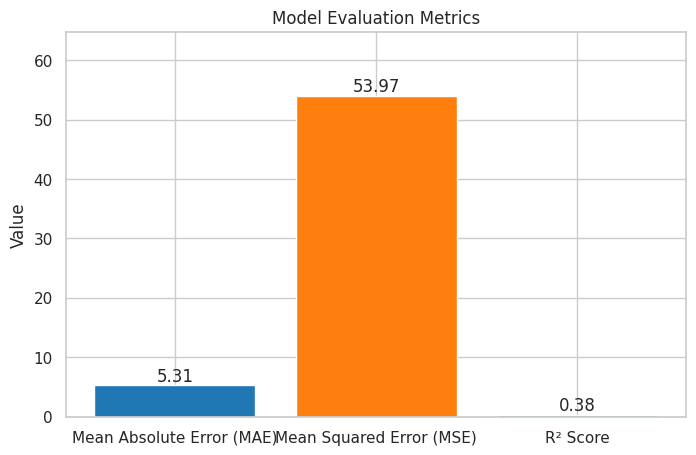

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# Assuming you have already trained your model and have X_test and y_test
# Make predictions
y_pred = model.predict(X_test)
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Prepare data for plotting
metrics = ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'R² Score']
values = [mae, mse, r2]
# Create a bar plot
plt.figure(figsize=(8, 5))
bar_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
plt.bar(metrics, values, color=bar_colors)
# Add title and labels
plt.title('Model Evaluation Metrics')
plt.ylabel('Value')
plt.ylim(0, max(values) * 1.2)  # Set y-axis limit to be a little higher than the max value
# Display the value on top of the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
# Show the plot
plt.show()


This code generates a density plot to visually compare the distribution of actual and predicted prices from the regression model:

Library Import: Utilizes Matplotlib and Seaborn for plotting.

Figure Setup: Initializes a figure with specified dimensions to ensure clarity in visualization.

Density Plot Creation:

Actual Prices: Plots the kernel density estimate (KDE) for actual prices in blue, filled with a semi-transparent color for better visual impact.
Predicted Prices: Overlays the KDE for predicted prices in orange, also filled to provide a clear distinction between the two distributions.
Axis Labeling and Title: Sets appropriate labels for the x-axis and a title for the plot, enhancing readability.

Legend Addition: Includes a legend to identify the actual and predicted price distributions.

Layout Adjustment: Applies a tight layout to optimize space usage before displaying the plot.

Display: Renders the plot, allowing for a direct visual comparison of how closely the predicted prices align with the actual prices.

This visualization assists in assessing the model's performance by highlighting similarities and discrepancies between the predicted and actual values.



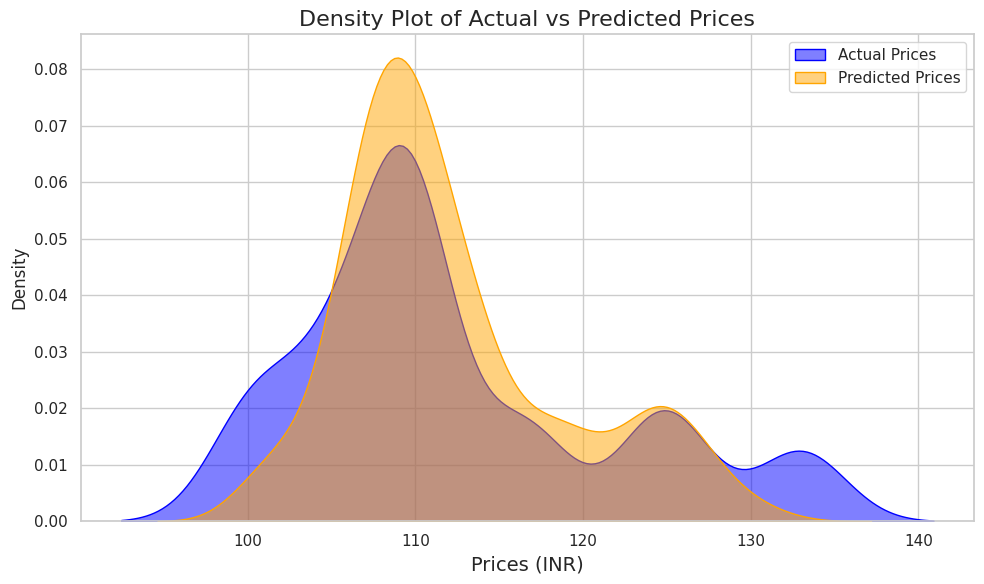

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, color='blue', label='Actual Prices', fill=True, alpha=0.5)
sns.kdeplot(y_pred, color='orange', label='Predicted Prices', fill=True, alpha=0.5)

# Set axis labels and title
plt.xlabel('Prices (INR)', fontsize=14)
plt.title('Density Plot of Actual vs Predicted Prices', fontsize=16)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


This code creates a histogram to visualize the distribution of prediction errors from the regression model:

Library Import: Uses Matplotlib and Seaborn for creating the plot.

Error Calculation: Computes the prediction errors by subtracting predicted prices from actual prices, resulting in a new variable called errors.

Figure Setup: Initializes a figure with defined dimensions to enhance clarity in the visual representation.

Error Distribution Plot:

Histogram: Plots a histogram of the prediction errors using 30 bins to show the frequency of different error values.
Kernel Density Estimate (KDE): Overlays a KDE on the histogram to illustrate the smoothed distribution of errors, providing insights into their density.
Axis Labeling and Title: Sets clear labels for both axes and adds a title to describe the plot's focus on prediction errors.

Layout Adjustment: Applies a tight layout to improve the overall appearance and prevent overlap of plot elements.

Display: Renders the plot to visualize the frequency distribution of prediction errors, aiding in the evaluation of the model's accuracy.

This visualization helps identify the distribution and frequency of errors, providing insights into model performance and areas for potential improvement.

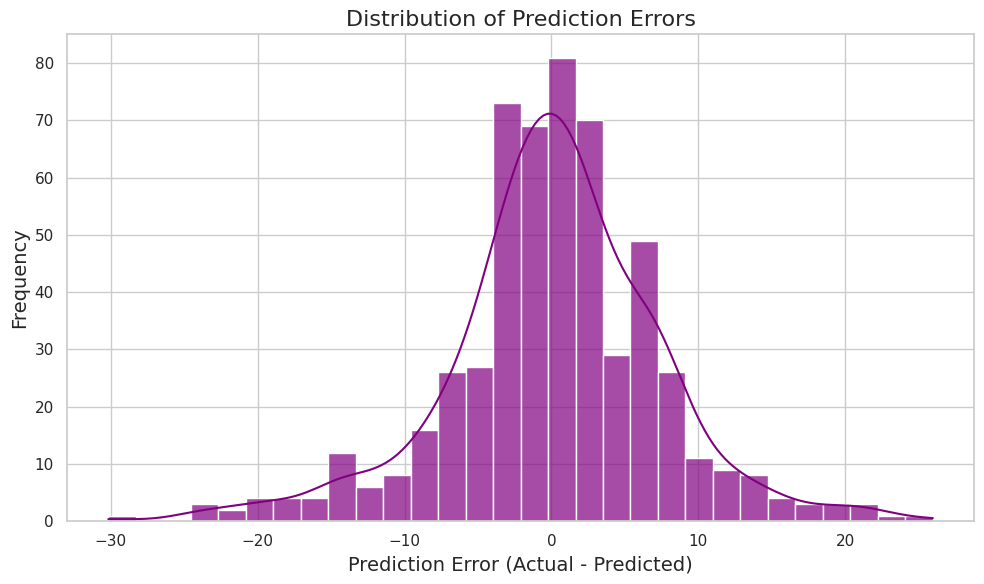

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate errors
errors = y_test - y_pred

# Create an error distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True, color='purple', alpha=0.7)

# Set axis labels and title
plt.xlabel('Prediction Error (Actual - Predicted)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Prediction Errors', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


This code generates a histogram to visualize the distribution of residuals from a regression model:

Library Import: Utilizes Matplotlib and Seaborn to create the visual representation, along with NumPy for numerical calculations.

Residual Calculation: Computes the residuals by subtracting predicted values (y_pred) from actual values (y_test), resulting in a variable called residuals.

Figure Setup: Initializes a figure with specified dimensions for better clarity and visibility in the final output.

Histogram and KDE Overlay:

Histogram: Plots the residuals as a histogram with 30 bins, representing the frequency of various residual values.
KDE Overlay: Adds a Kernel Density Estimate (KDE) to illustrate the smoothed distribution of residuals, enhancing the understanding of their density.
Mean and Standard Deviation:

Calculates the mean and standard deviation of the residuals using NumPy functions for further analysis of the error distribution.
Draws a vertical dashed line at the mean residual value using orange color for emphasis.
Zero Residual Line: Includes a red dashed line at zero residual to indicate the ideal case where predictions perfectly match actual values.

Axis Labeling and Title: Sets clear labels for both axes and adds a descriptive title to convey the plot's focus on residual distribution.

Legend: Displays a legend to clarify the meaning of the lines indicating the mean and zero residual.

Layout Adjustment: Applies a tight layout to ensure elements do not overlap, enhancing readability.

Display: Renders the plot to visualize the distribution of residuals, facilitating the assessment of model performance and identifying patterns in the prediction errors.

This visualization is crucial for diagnosing model performance, allowing for the identification of systematic errors or patterns in residuals that may indicate model deficiencies.

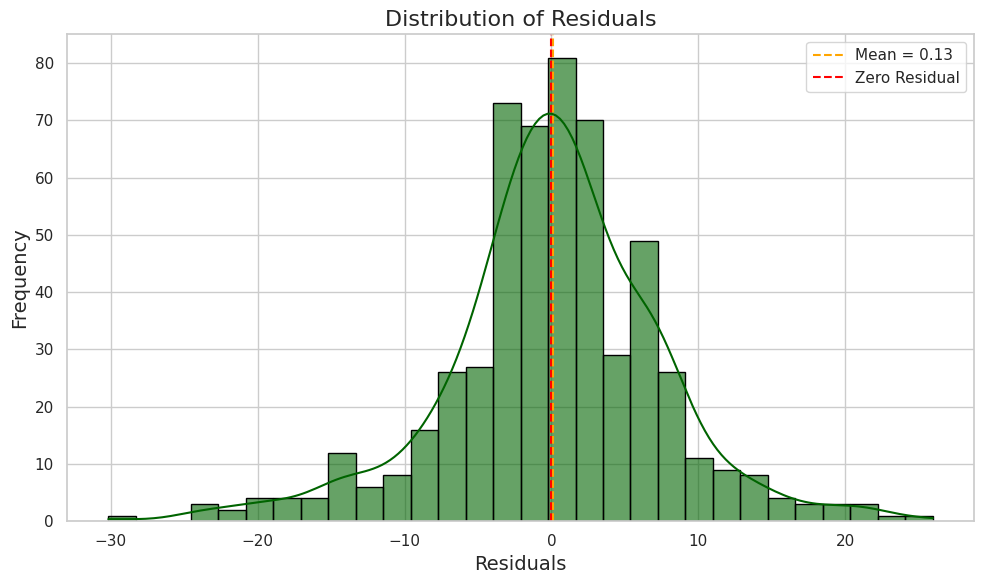

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Calculate residuals
residuals = y_test - y_pred
# Create the plot
plt.figure(figsize=(10, 6))
# Create a histogram with a KDE overlay using light green
sns.histplot(residuals, bins=30, kde=True, color='darkgreen', edgecolor='black', alpha=0.6)
# Calculate and display mean and standard deviation
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)
# Draw lines for mean and zero residual
plt.axvline(x=mean_residual, color='orange', linestyle='--', label='Mean = {:.2f}'.format(mean_residual))
plt.axvline(x=0, color='red', linestyle='--', label='Zero Residual')
# Set axis labels and title
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Residuals', fontsize=16)
plt.legend()
# Show the plot
plt.tight_layout()
plt.show()

This code generates a heatmap to visualize the average price sensitivity of various food items based on a dataset:

Library Import: Imports essential libraries: Matplotlib for plotting, Seaborn for enhanced visualizations, and Pandas for data manipulation.

Dataset Loading: Reads the dataset from a specified CSV file (updated_foods_with_imported_and_sensitivity.csv) into a Pandas DataFrame called data.

Price Sensitivity Mapping:

Creates a mapping for price sensitivity levels (Low, Medium, High) to numerical values (1, 2, 3).
Adds a new column, Sensitivity Value, to the DataFrame, translating categorical sensitivity levels into numerical values for heatmap representation.
Pivot Table Creation: Constructs a pivot table from the data, using Item as the index and the average Sensitivity Value as the value to be aggregated.

Sorting: Sorts the pivot table in descending order to position items with higher sensitivity values at the top of the heatmap, allowing for easier interpretation.

Color Palette Definition: Defines a color palette that transitions from sky blue to red using a reversed Red-Yellow-Blue color scheme, enhancing the visualization's clarity.

Figure Setup: Increases the figure size to 12x15 inches to reduce congestion in the heatmap.

Heatmap Creation:

Uses Seaborn’s heatmap function to create the visualization without annotations for a cleaner appearance.
Includes a color bar to provide context for the price sensitivity values, labeled appropriately.
Title and Labels:

Adds a title ("Heatmap of Price Sensitivity for Items") with specified font size and padding for clarity.
Labels the y-axis with "Item" and the x-axis with a single label ("Price Sensitivity"), ensuring clear axis representation.
X-axis Configuration: Configures the x-axis to show a single tick for "Price Sensitivity," enhancing readability.

Layout Adjustment: Applies a tight layout to prevent overlap of elements, ensuring a clean presentation.

Visualization Display: Renders the heatmap to visualize the distribution of price sensitivity levels across different items, providing valuable insights into how sensitivity varies among the food products.

This heatmap serves as an effective tool for identifying and analyzing price sensitivity trends, supporting decision-making related to pricing strategies and market segmentation.

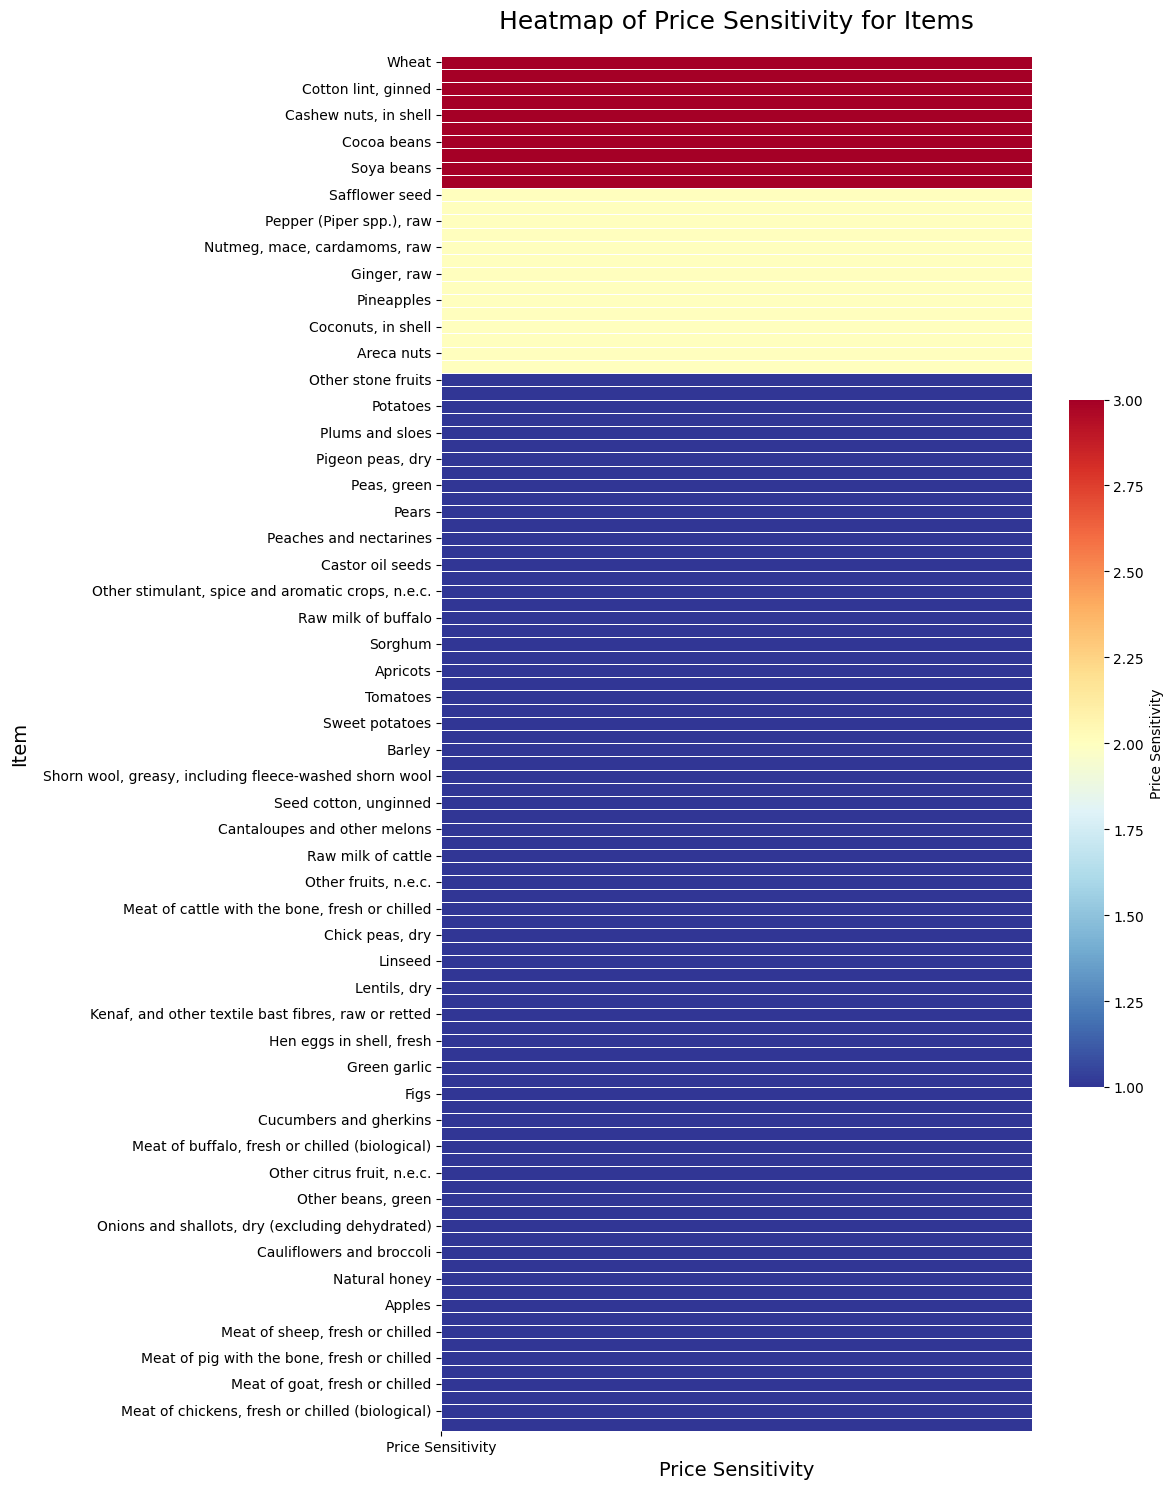

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Load the dataset
data = pd.read_csv('/content/updated_foods_with_imported_and_sensitivity.csv')
# Create a new DataFrame for heatmap purposes
# Assign numerical values for each price sensitivity level
sensitivity_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
data['Sensitivity Value'] = data['Price Sensitivity'].map(sensitivity_mapping)
# Create a pivot table for the heatmap
heatmap_data = data.pivot_table(index='Item', values='Sensitivity Value', aggfunc='mean')
# Sort the data to ensure high sensitivity values are at the top
heatmap_data = heatmap_data.sort_values(by='Sensitivity Value', ascending=False)
# Define a color palette that gradually transitions from sky blue to yellow to red
cmap = sns.color_palette("RdYlBu_r", as_cmap=True)  # Reversed Red-Yellow-Blue palette for smoother transition
# Increase figure size to make the plot less congested
plt.figure(figsize=(12, 15))
sns.heatmap(
    heatmap_data,
    annot=False,  # Disable annotations
    cmap=cmap,  # Use the defined color palette
    linewidths=0.5,
    cbar_kws={'label': 'Price Sensitivity', 'shrink': 0.5}  # Add color bar label)
plt.title('Heatmap of Price Sensitivity for Items', fontsize=18, pad=20)
plt.ylabel('Item', fontsize=14, labelpad=10)
plt.xlabel('Price Sensitivity', fontsize=14)  # Single x-axis label
plt.xticks(ticks=[0], labels=['Price Sensitivity'], rotation=0)
plt.tight_layout()
plt.show()


This code snippet generates a bar chart to visually represent the count of imported and non-imported food items from a dataset:

Library Import: It imports necessary libraries, Seaborn for enhanced visualizations and Matplotlib for general plotting capabilities.

Data Preparation:

It counts the occurrences of imported versus non-imported items in the Imported column of the DataFrame data using the value_counts() method. The resulting counts are stored in the import_counts variable.
Figure Setup: A figure with a size of 10x6 inches is created to accommodate the bar chart.

Bar Chart Creation:

It uses Seaborn’s barplot() function to create the bar chart. The x-axis represents the status of the items (Imported or Non-Imported), and the y-axis represents the count of items in each category. The color palette 'viridis' is applied for a visually appealing gradient.
Customization:

The chart's title ("Count of Imported vs Non-Imported Items") is set for clarity.
The x-axis and y-axis labels are added, identifying the data represented.
The x-ticks are set to rotate at 0 degrees for better readability.
Grid Lines: Horizontal grid lines are added to the y-axis to enhance readability, making it easier to interpret the values.

Layout Adjustment: The tight_layout() function is called to optimize the layout, ensuring that elements do not overlap.

Visualization Display: The plot is rendered and displayed, providing a clear visual comparison of the count of imported versus non-imported items.

This bar chart serves as an effective tool for understanding the distribution of imported and non-imported items in the dataset, aiding in analysis related to market dynamics and inventory management.



<ipython-input-38-25f5332ee8e7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=import_counts.index, y=import_counts.values, palette='viridis')


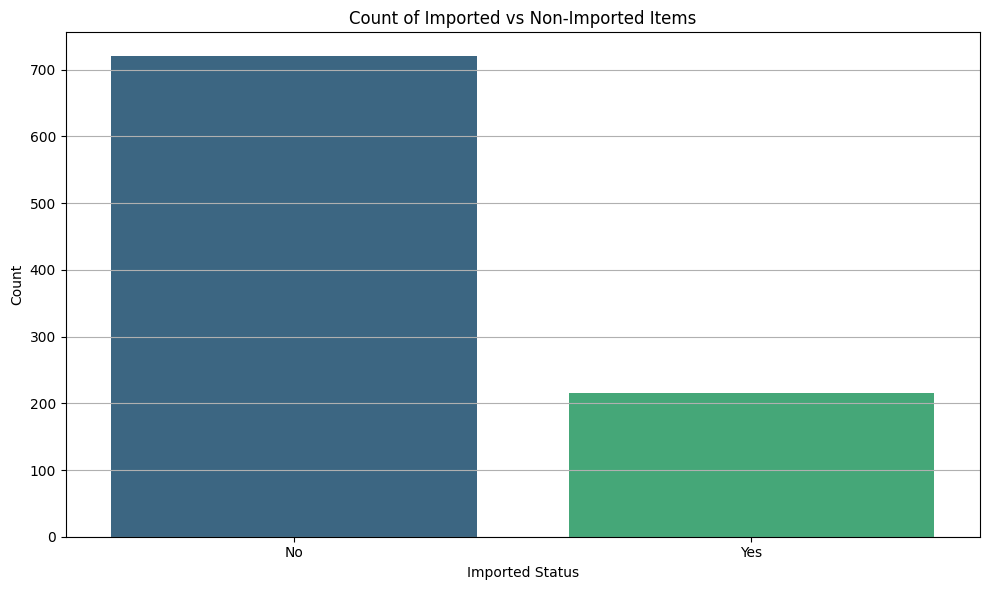

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of imported vs non-imported items
import_counts = data['Imported'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=import_counts.index, y=import_counts.values, palette='viridis')

# Customize the appearance
plt.title('Count of Imported vs Non-Imported Items')
plt.xlabel('Imported Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')  # Add grid lines for better readability
plt.tight_layout()

# Display the plot
plt.show()


This code snippet generates a bar chart to visualize the average values of imported food items categorized by their price sensitivity:

Library Imports: The code begins by importing necessary libraries: Pandas for data manipulation, Seaborn for creating visually appealing plots, and Matplotlib for general plotting functionalities. It also imports the warnings library to manage warning messages.

Suppressing Warnings: Any warning messages that may arise during execution are suppressed using warnings.filterwarnings("ignore"), ensuring a clean output.

Data Loading: The dataset is loaded from a CSV file located at /content/updated_foods_with_imported_and_sensitivity.csv into a DataFrame called data.

Filtering Data:

The dataset is filtered to include only those items marked as imported. This is achieved by selecting rows where the Imported column equals 'Yes'. Adjustments may be necessary if the column uses different values.
Calculating Averages:

The average value for each price sensitivity category is calculated using the groupby() method. The resulting DataFrame, average_values, contains two columns: Price Sensitivity and the corresponding average Value.
Bar Chart Creation:

A figure of size 10x6 inches is created for the bar chart.
Seaborn's barplot() function is utilized to create the chart. The x-axis represents the price sensitivity categories, while the y-axis displays the average values. The specified color palette includes blue, green, and red for distinct categories.
Customization:

A title ("Imported Items by Price Sensitivity") is added for clarity.
The x-axis and y-axis labels are defined to indicate what data is being represented.
The x-ticks are set to remain horizontal for readability.
Grid Lines: Horizontal grid lines are included along the y-axis to enhance the chart's readability, aiding in the comparison of average values.

Layout Adjustment: The tight_layout() function is called to optimize the layout, ensuring that all elements fit well within the figure without overlapping.

Visualization Display: The plot is rendered and displayed, providing insights into how average values of imported items vary with different price sensitivity categories.

This bar chart serves as a valuable tool for understanding the relationship between price sensitivity and average values of imported food items, assisting in pricing strategies and inventory management.

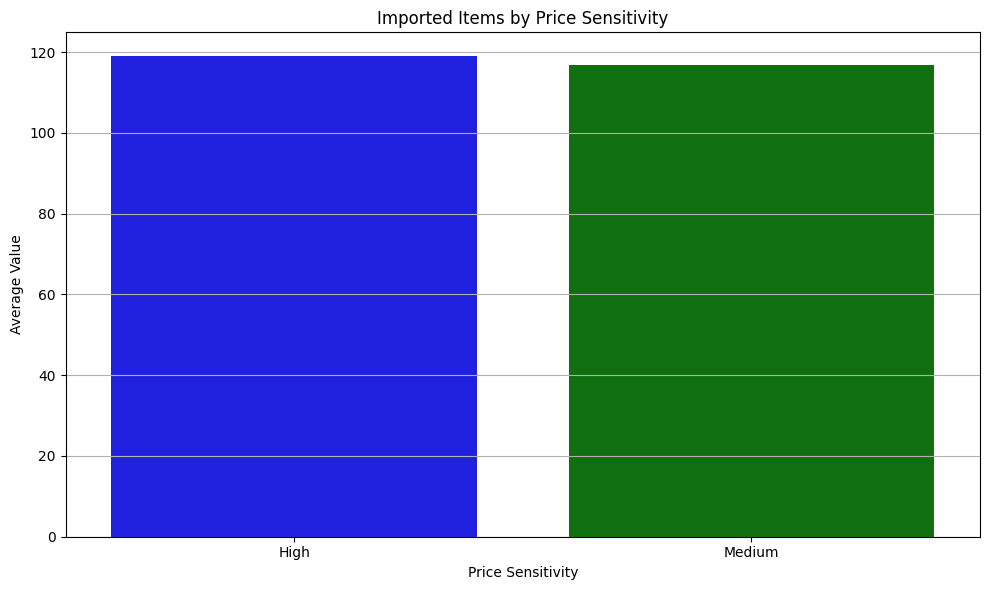

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv('/content/updated_foods_with_imported_and_sensitivity.csv')

# Filter the dataset to include only imported items
imported_data = data[data['Imported'] == 'Yes']  # Adjust if your 'Imported' column has different values

# Calculate the average values for each price sensitivity category
average_values = imported_data.groupby('Price Sensitivity')['Value'].mean().reset_index()

# Create the bar chart with specified colors for each category
plt.figure(figsize=(10, 6))
sns.barplot(x='Price Sensitivity', y='Value', data=average_values, palette=['blue', 'green', 'red'])

# Customize the appearance
plt.title('Imported Items by Price Sensitivity')
plt.xlabel('Price Sensitivity')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.grid(axis='y')  # Add grid lines for better readability
plt.tight_layout()

# Display the plot
plt.show()


This code generates a bar chart to visualize the average values of non-imported food items categorized by price sensitivity:

Library Imports: It uses Seaborn and Matplotlib for plotting.

Data Filtering: The dataset is filtered to include only non-imported items by selecting rows where the Imported column equals 'No'.

Average Calculation: It calculates the average value for each price sensitivity category (Low, Medium, High) using groupby() and mean().

Bar Chart Creation: A bar chart is created with Seaborn's barplot() function, showing average values against price sensitivity categories, using a palette of purple, orange, and red.

Customization: The chart is titled "Non-Imported Items by Price Sensitivity," with labeled axes and horizontal grid lines for better readability.

Display: The tight_layout() function ensures a clean layout, and the plot is displayed, highlighting average values based on price sensitivity for non-imported items.

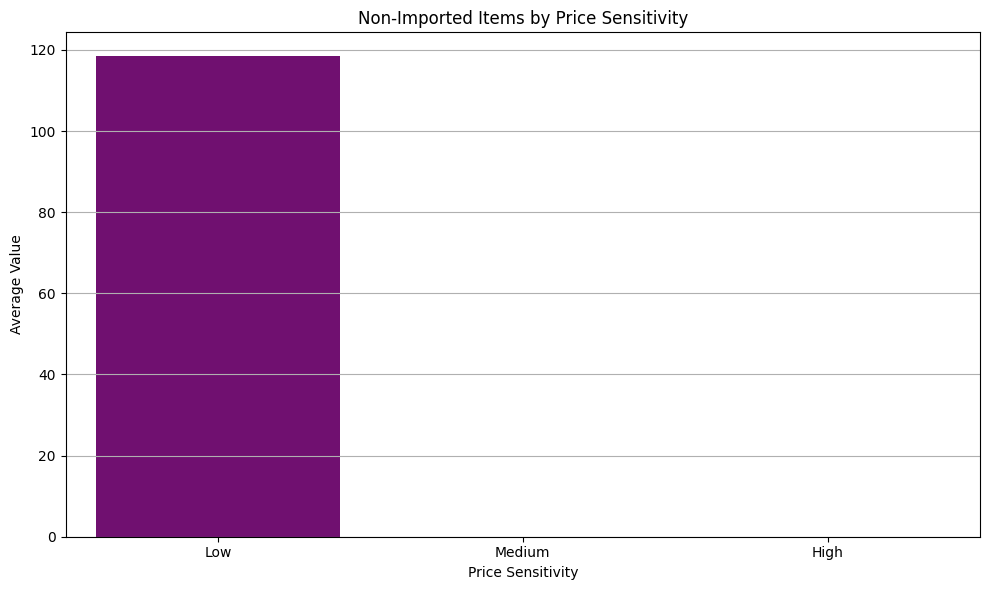

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset to include only non-imported items
non_imported_data = data[data['Imported'] == 'No']

# Calculate the average value for non-imported items grouped by price sensitivity
average_values = non_imported_data.groupby('Price Sensitivity')['Value'].mean().reindex(['Low', 'Medium', 'High']).reset_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Price Sensitivity', y='Value', data=average_values, palette=['purple', 'orange', 'red'])

# Customize the appearance
plt.title('Non-Imported Items by Price Sensitivity')
plt.xlabel('Price Sensitivity')
plt.ylabel('Average Value')
plt.grid(axis='y')  # Add grid lines for better readability
plt.tight_layout()

# Display the plot
plt.show()


This code generates a line plot to visualize the trend of total imported values over the years:

Data Grouping: The dataset is grouped by Year and Imported status, calculating the total values for each group. The results are then reshaped with unstack() for easier plotting.

Line Plot Creation:

A figure of size 12x6 inches is created for the plot.
Two lines are plotted separately: one for imported values (labeled 'Yes') in red and one for non-imported values (labeled 'No') in orange. Each line features markers for clarity.
Customization:

The plot is titled "Trend of Total Imported Value Over Years," and axes are labeled accordingly.
The x-axis labels are rotated for better readability, and a grid is added for easier data interpretation.
Legend and Layout: A legend differentiates the imported status, and tight_layout() ensures all elements fit well within the figure.

Display: The final plot is rendered, providing insights into the trends of imported and non-imported values across the years.



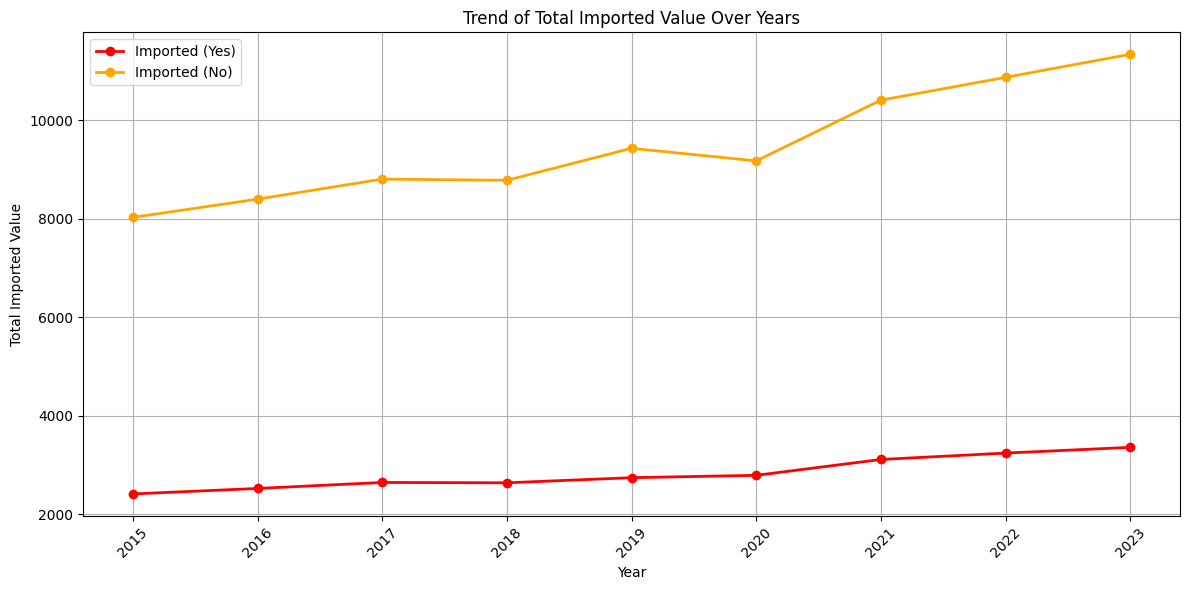

In [ ]:
# Group by year and calculate the total imported values
year_imported_sum = data.groupby(['Year', 'Imported'])['Value'].sum().unstack()

# Create the line plot
plt.figure(figsize=(12, 6))

# Plot each line separately to customize colors
year_imported_sum['Yes'].plot(kind='line', marker='o', color='red', linewidth=2, label='Imported (Yes)')
year_imported_sum['No'].plot(kind='line', marker='o', color='orange', linewidth=2, label='Imported (No)')

# Customize the appearance
plt.title('Trend of Total Imported Value Over Years')
plt.xlabel('Year')
plt.ylabel('Total Imported Value')
plt.xticks(rotation=45)
plt.grid()
plt.legend()  # Show the legend
plt.tight_layout()

# Display the plot
plt.show()

Data Grouping: The code groups the dataset by Year and calculates the total Value of imported items for each year.

Bar Plot Creation: It uses Seaborn to create a bar plot, visualizing the total value of imported items over the years. The plot size is set to 15x8 inches for better visibility.

Customization: Titles and labels are added to the plot. The x-axis labels are rotated for improved readability.

Display: Finally, the plot is displayed, allowing for easy interpretation of trends in the total value of imported items across different years.

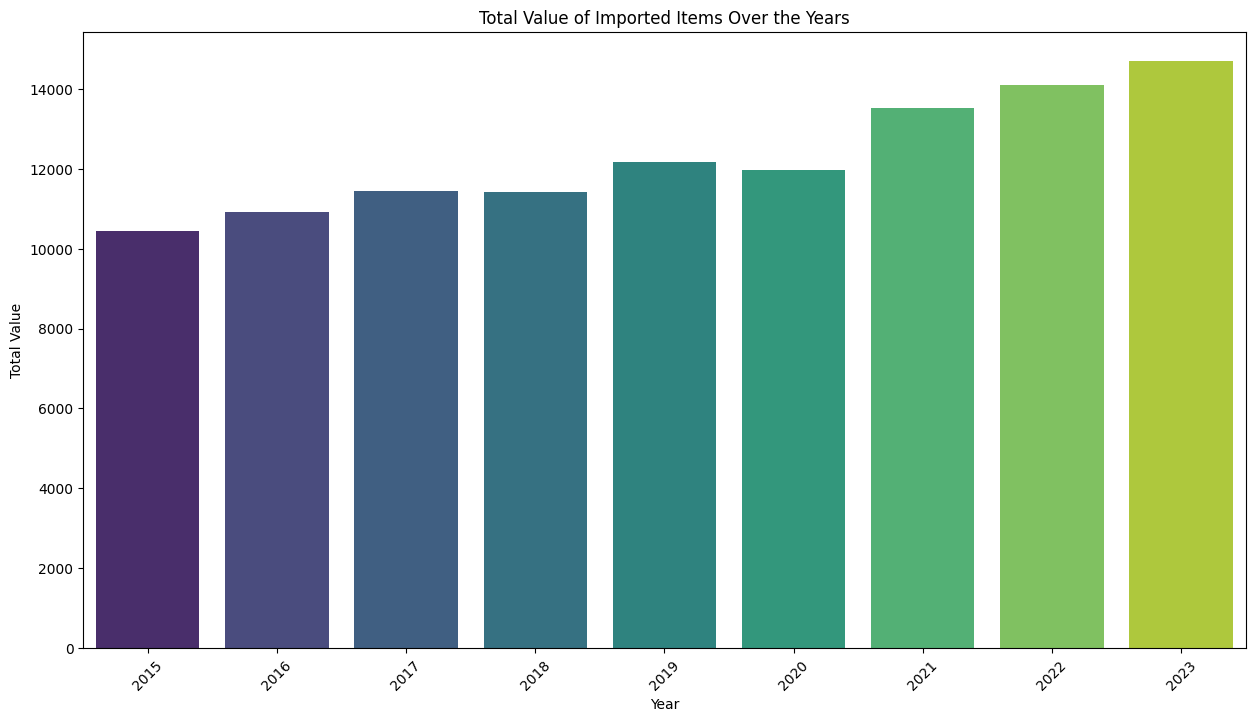

In [ ]:
year_value_data = data.groupby('Year').agg({'Value': 'sum'}).reset_index()

plt.figure(figsize=(15, 8))
sns.barplot(data=year_value_data, x='Year', y='Value', palette='viridis')

plt.title('Total Value of Imported Items Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.xticks(rotation=45)
plt.show()


Data Loading: The code loads a dataset of highly perishable foods from a specified CSV file.

Data Grouping: It groups the data by Year and Item, calculating the total Value for each item in each year. This creates a pivot table format with years as rows and items as columns.

Line Plot Creation: A line plot is generated to visualize the trend of imported quantities of highly perishable goods over the years. The plot size is set to 12x6 inches.

Customization: The plot is customized with a title, x and y labels, rotated x-axis ticks for clarity, a grid for better readability, and a legend to distinguish between items.

Display: Finally, the plot is displayed, allowing for a clear understanding of trends in the import quantities of different items over the years.



<Figure size 1200x600 with 0 Axes>

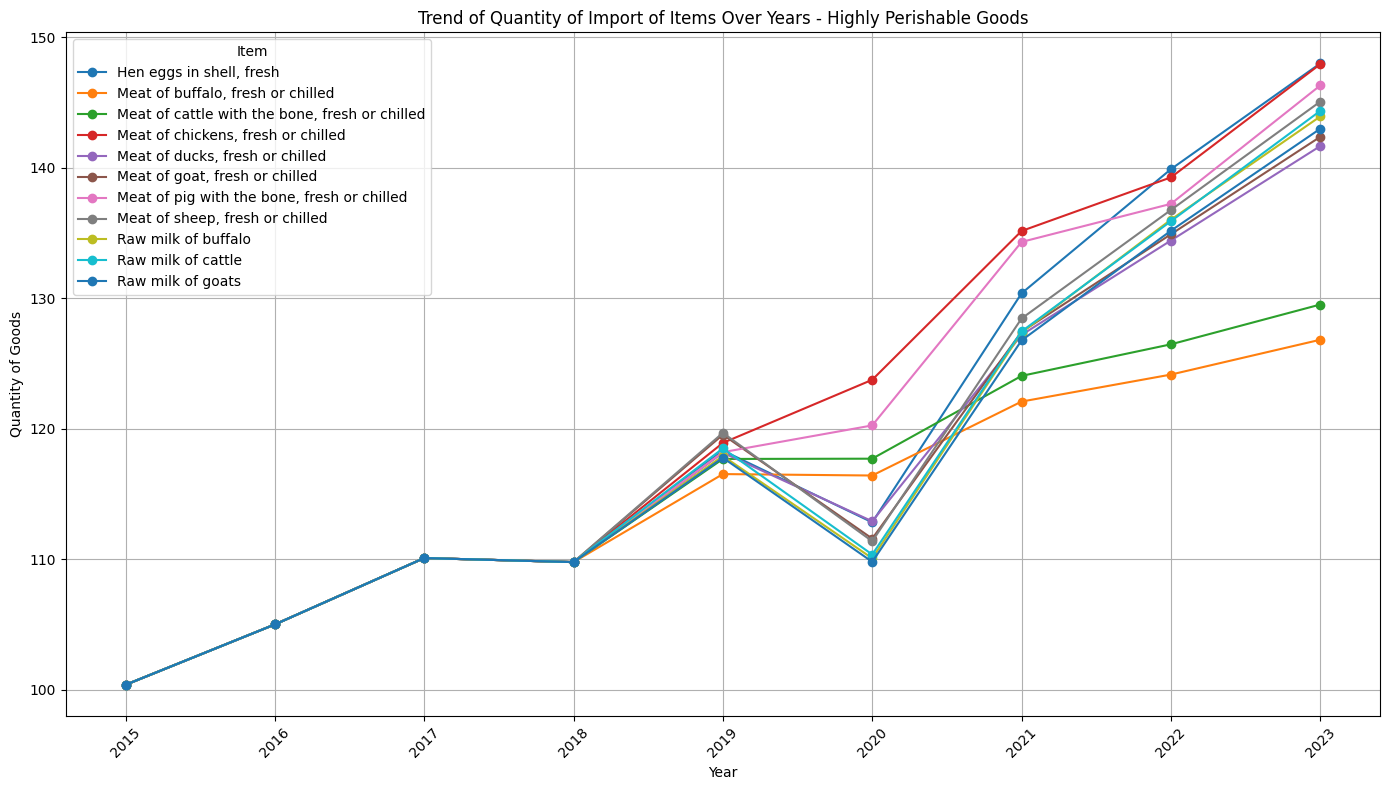

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the specified path
data = pd.read_csv('/content/highly_perishable_foods.csv')

# Group by Year and Item, summing the Value
year_item_value = data.groupby(['Year', 'Item'])['Value'].sum().unstack()

# Create the line plot
plt.figure(figsize=(12, 6))
year_item_value.plot(kind='line', marker='o', figsize=(14, 8))

# Customize the appearance
plt.title('Trend of Quantity of Import of Items Over Years - Highly Perishable Goods')
plt.xlabel('Year')
plt.ylabel('Quantity of Goods')
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Item')
plt.tight_layout()

# Display the plot
plt.show()


This code visualizes the trends in the quantity of highly perishable goods imported over the years.

Data Organization: It uses a FacetGrid to create multiple line plots, one for each item in the dataset. This helps in comparing trends across different items.

Trend Visualization: Each plot shows how the quantity of a specific item changes over time, with data points marked for clarity.

Custom Titles and Labels: Each subplot is titled with the item's name, while the axes are labeled as "Year" and "Quantity," making it easy to understand.

Legend and Layout: A legend is included to clarify the data, and the layout is adjusted to prevent overlapping, ensuring readability.

Final Display: The code generates a clear and organized visual representation of the trends in imported quantities of perishable goods.

This visualization aids in understanding patterns in import quantities over time for better decision-making.

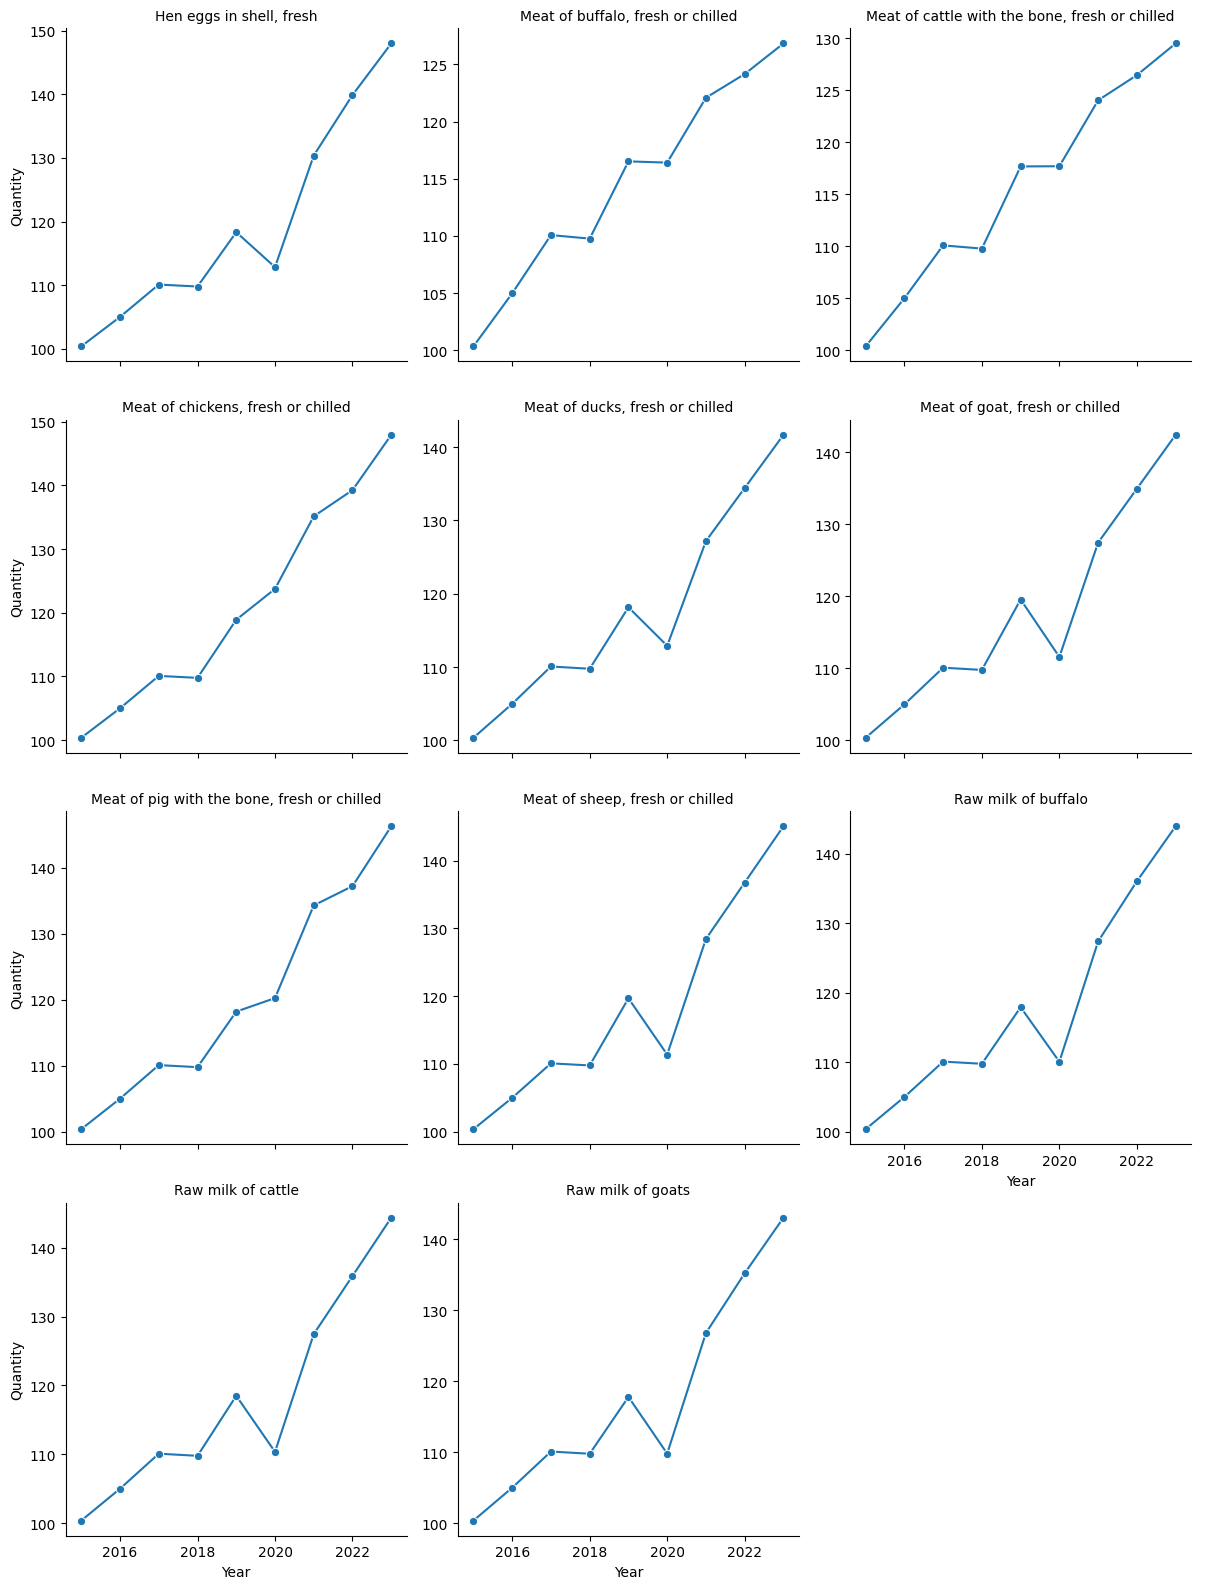

In [ ]:
import seaborn as sns

# Create a FacetGrid for line plots
g = sns.FacetGrid(data, col='Item', col_wrap=3, height=4, sharey=False)
g.map(sns.lineplot, 'Year', 'Value', marker='o')

# Customize the appearance
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Year", "Quantity")
g.add_legend()

# Adjust the layout
plt.tight_layout()
plt.show()
https://colab.research.google.com/drive/1Fo_1FfEkGG7vIJRPOYWITyCyRWerS9lJ#scrollTo=eQ-6XSl-legR


This code analyzes and visualizes the import trends of perishable goods over several years.

Data Aggregation: The dataset is grouped by Year and Item to sum the Value for each combination. This helps to consolidate the total quantity of each item imported per year.

Line Plot Creation: A line plot is generated to visualize these trends. Each line represents a specific perishable item, showing how its import quantity fluctuates over time.

Customization: The plot features:

Title: Clearly indicates what the plot represents.
Axes Labels: The x-axis is labeled "Year," and the y-axis is labeled "Quantity of goods," making it easy to interpret the data.
Grid Lines: Added for better readability, helping to track values across the plot.
Legend: Identifies which line corresponds to which item, enhancing clarity.
Final Output: The resulting plot is well-organized, allowing viewers to easily compare the import trends of different perishable goods over the years, providing valuable insights for analysis and decision-making.

<Figure size 1200x600 with 0 Axes>

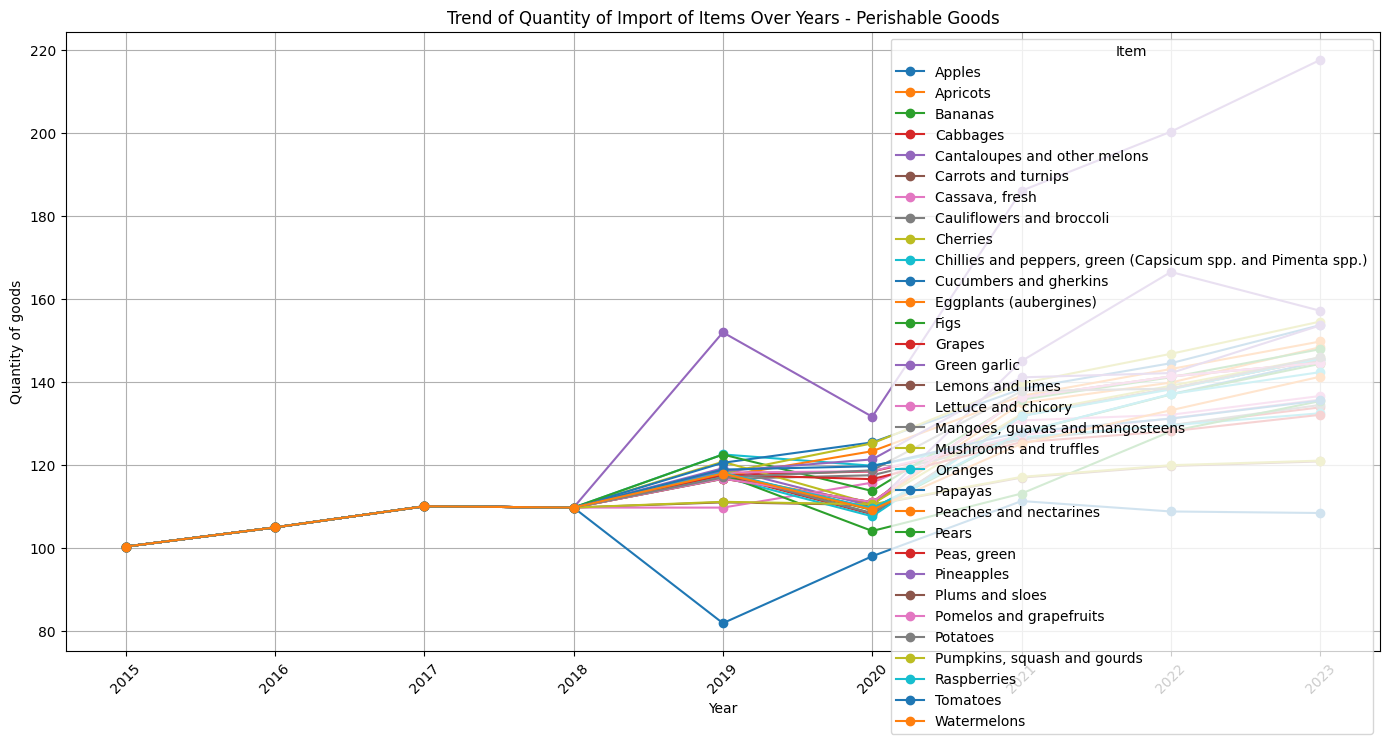

In [ ]:
# Group by Year and Item, summing the Value
year_item_value = data.groupby(['Year', 'Item'])['Value'].sum().unstack()

# Create the line plot
plt.figure(figsize=(12, 6))
year_item_value.plot(kind='line', marker='o', figsize=(14, 8))

# Customize the appearance
plt.title('Trend of Quantity of Import of Items Over Years - Perishable Goods')
plt.xlabel('Year')
plt.ylabel('Quantity of goods')
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Item')
plt.tight_layout()

# Display the plot
plt.show()


This code snippet utilizes Seaborn to create a series of line plots, allowing for a detailed analysis of the import trends of various items over the years.

FacetGrid Creation:

The FacetGrid function is employed to create a grid of plots, each representing a different item from the dataset.
The col='Item' parameter specifies that each column in the grid corresponds to a unique item, and col_wrap=3 ensures that only three plots are displayed in each row for better visibility.
Mapping the Line Plot:

The map function applies the sns.lineplot method to each facet, plotting the Year on the x-axis and the Value (import quantity) on the y-axis.
Markers are added to the line plots for better visibility of individual data points.
Customization:

The titles for each plot are automatically set to the name of the item using set_titles(col_template="{col_name}").
The axes are labeled for clarity, with "Year" for the x-axis and "Quantity" for the y-axis.
Legend Addition:

A legend is added to help identify the different items represented in the grid.
Layout Adjustment:

The plt.tight_layout() function is called to ensure that the plots are spaced appropriately, preventing overlap and enhancing readability.
Final Output:

The resulting visualization displays multiple line plots in a grid format, allowing for easy comparison of import trends across different items over time. This format aids in quickly identifying patterns and anomalies in the data, supporting effective analysis and insights.

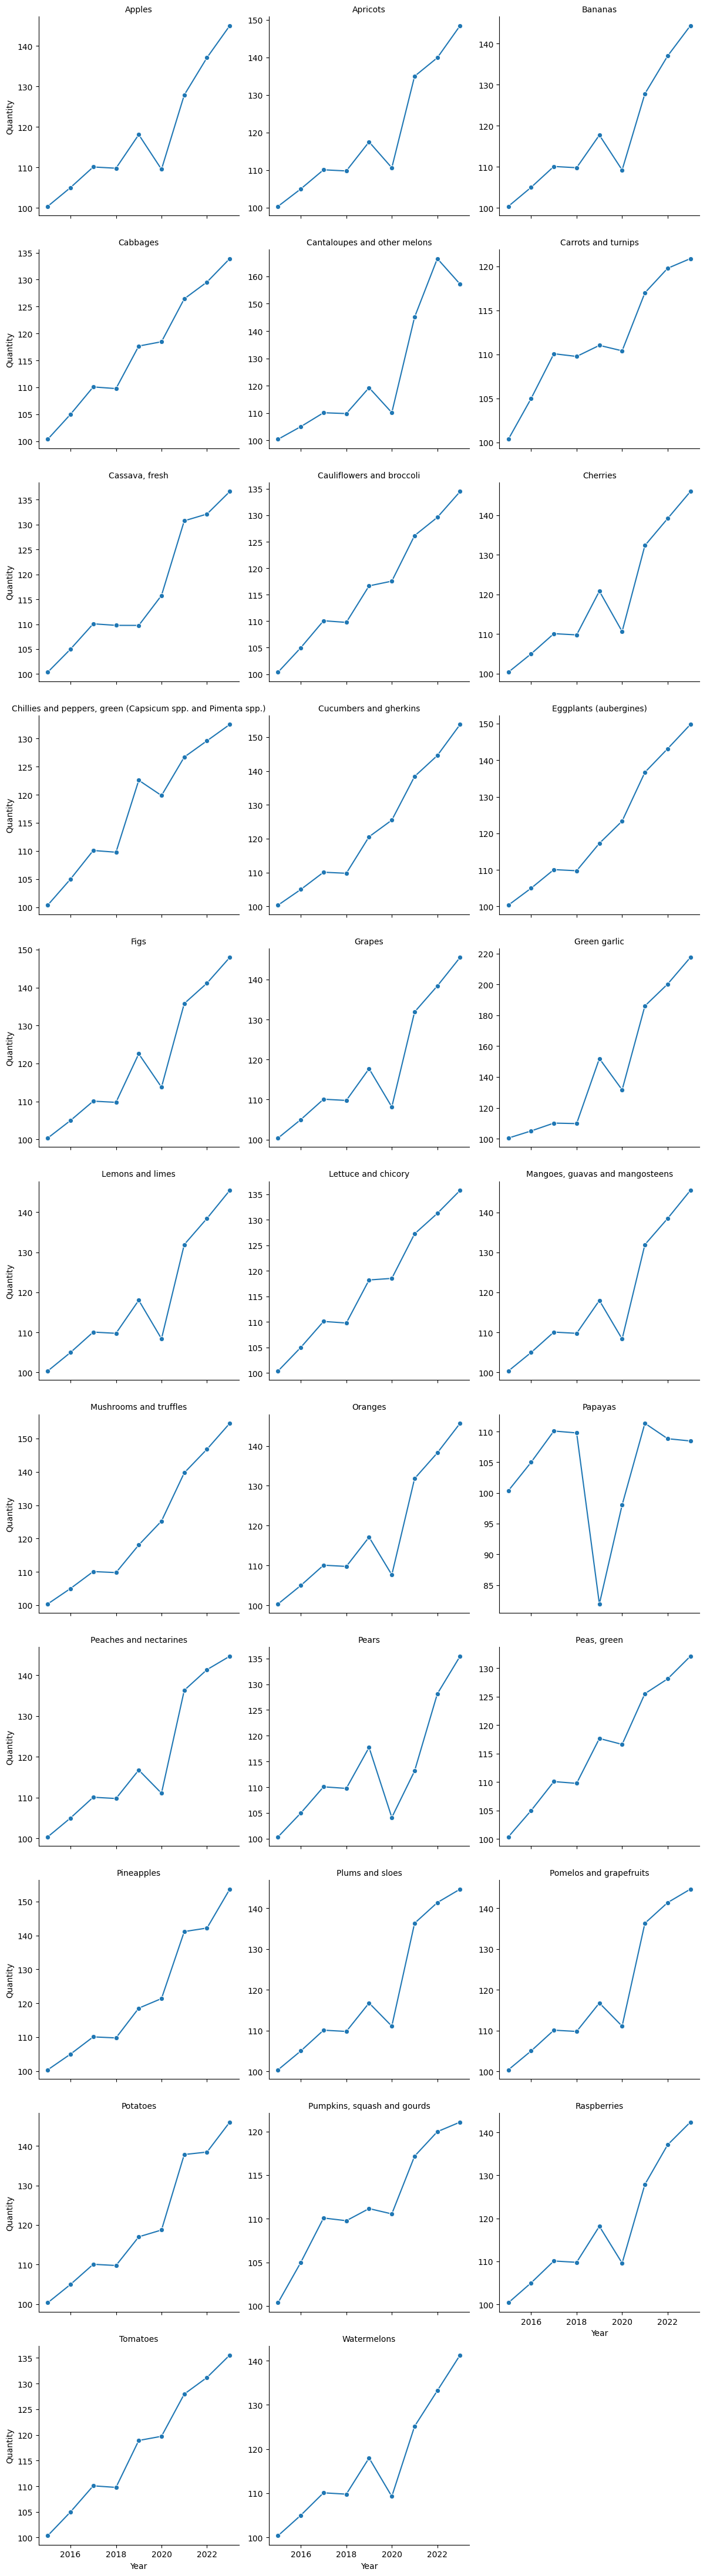

In [ ]:
import seaborn as sns

# Create a FacetGrid for line plots
g = sns.FacetGrid(data, col='Item', col_wrap=3, height=4, sharey=False)
g.map(sns.lineplot, 'Year', 'Value', marker='o')

# Customize the appearance
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Year", "Quantity")
g.add_legend()

# Adjust the layout
plt.tight_layout()
plt.show()


This code snippet generates a line plot that visualizes the import trends of various non-perishable goods over several years.

Data Loading:

The dataset is loaded using Pandas, reading from the specified CSV file non_perishable_foods.csv.
Data Grouping:

The data is grouped by Year and Item.
The groupby method aggregates the total import quantity (Value) for each item in each year, reshaping the data using unstack() for easier plotting.
Line Plot Creation:

A line plot is generated using the plot method, with years on the x-axis and the total quantity of goods imported on the y-axis.
The marker='o' parameter adds circular markers at each data point for improved visibility.
Customization:

The title, x-axis label, and y-axis label are set to provide context.
The x-axis ticks are rotated 45 degrees for better readability.
A grid is added to the background to facilitate the tracking of values across the plot.
A legend is included to identify different items represented in the plot.
Layout Adjustment:

The tight_layout() function is called to ensure that plot elements do not overlap, making the visualization cleaner and more interpretable.
Final Visualization:

The resulting plot displays trends in the import quantities of non-perishable goods over time, enabling the analysis of patterns, peaks, and declines in import activities for various items. This visual representation supports informed decision-making regarding inventory and supply chain management for non-perishable goods.

<Figure size 1200x600 with 0 Axes>

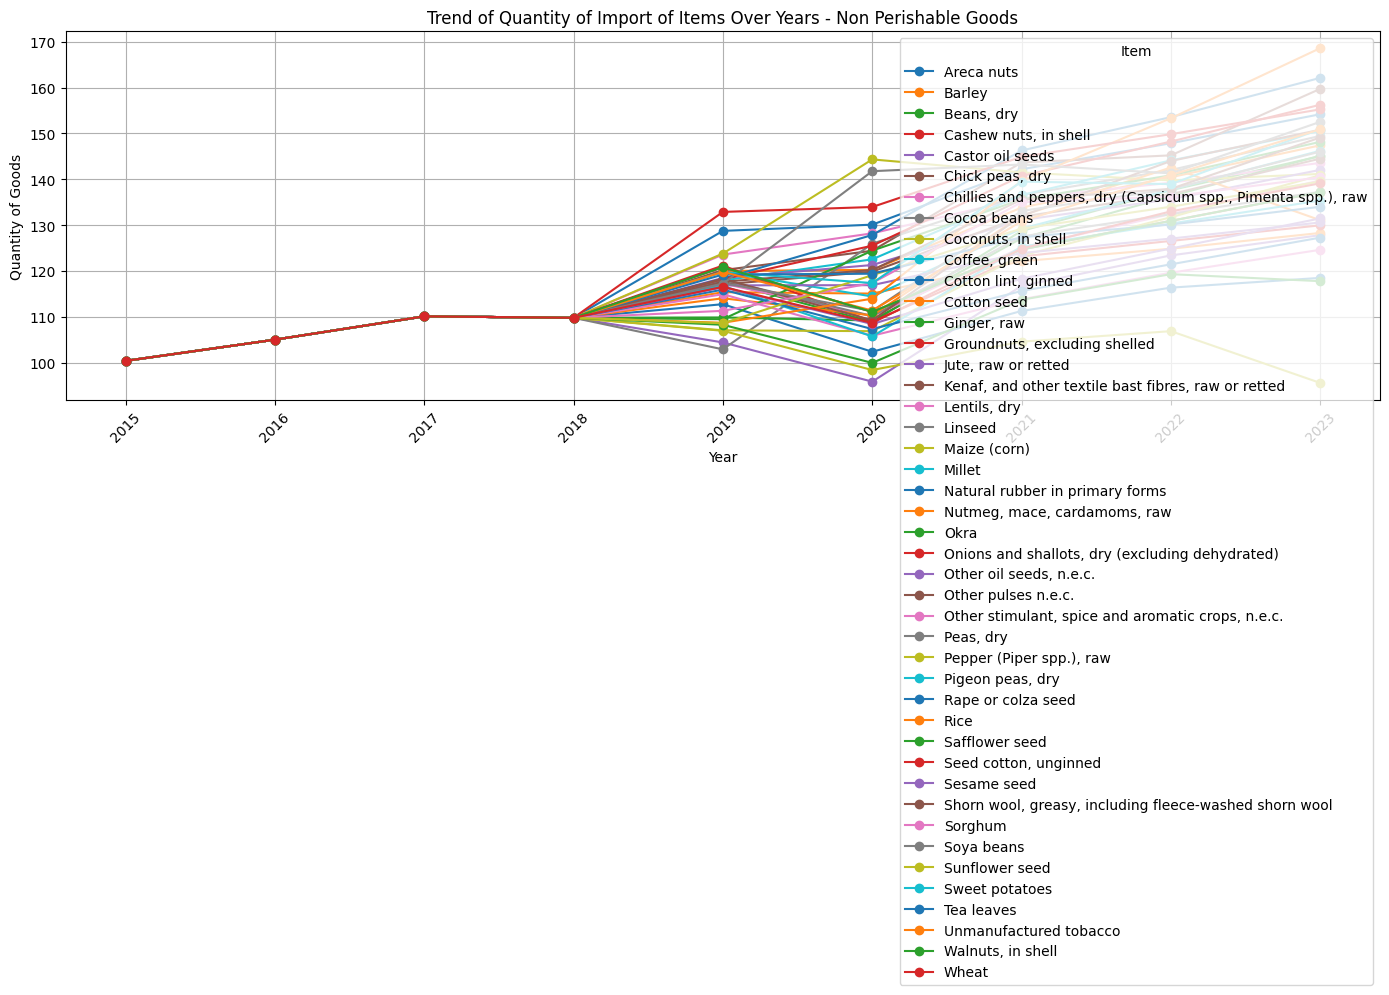

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the specified path
data = pd.read_csv('/content/non_perishable_foods.csv')

# Group by Year and Item, summing the Value
year_item_value = data.groupby(['Year', 'Item'])['Value'].sum().unstack()

# Create the line plot
plt.figure(figsize=(12, 6))
year_item_value.plot(kind='line', marker='o', figsize=(14, 8))

# Customize the appearance
plt.title('Trend of Quantity of Import of Items Over Years - Non Perishable Goods')
plt.xlabel('Year')
plt.ylabel('Quantity of Goods')
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Item')
plt.tight_layout()

# Display the plot
plt.show()


This code snippet creates a series of line plots using Seaborn to visualize the import trends of various items over time, allowing for a detailed examination of each item separately.

FacetGrid Creation:

A FacetGrid is established, with each subplot representing a different item.
The col parameter specifies that each item will have its own column, and col_wrap=3 allows for wrapping after three plots to keep the layout organized.
Plotting:

The map function is utilized to apply the lineplot to each facet.
The x-axis represents the Year, while the y-axis denotes the Quantity of goods imported.
Each data point on the line is marked with a circular marker (marker='o') for better visibility.
Customization:

The set_titles method customizes the titles of each subplot based on the item name, enhancing clarity.
The axes are labeled to indicate what each axis represents—Year for the x-axis and Quantity for the y-axis.
A legend is added to the grid, which is particularly useful if multiple lines (items) were plotted in a single facet (not applicable here since each item is in a separate plot).
Layout Adjustment:

The tight_layout() function ensures that the plots are neatly arranged without overlapping labels or titles, improving the overall presentation.
Final Visualization:

The result is a grid of line plots that allows for easy comparison of the import trends of various items over the years.
This visualization enables analysts to identify trends, seasonal variations, and differences in import quantities among different items, providing valuable insights for inventory management and supply chain strategies.

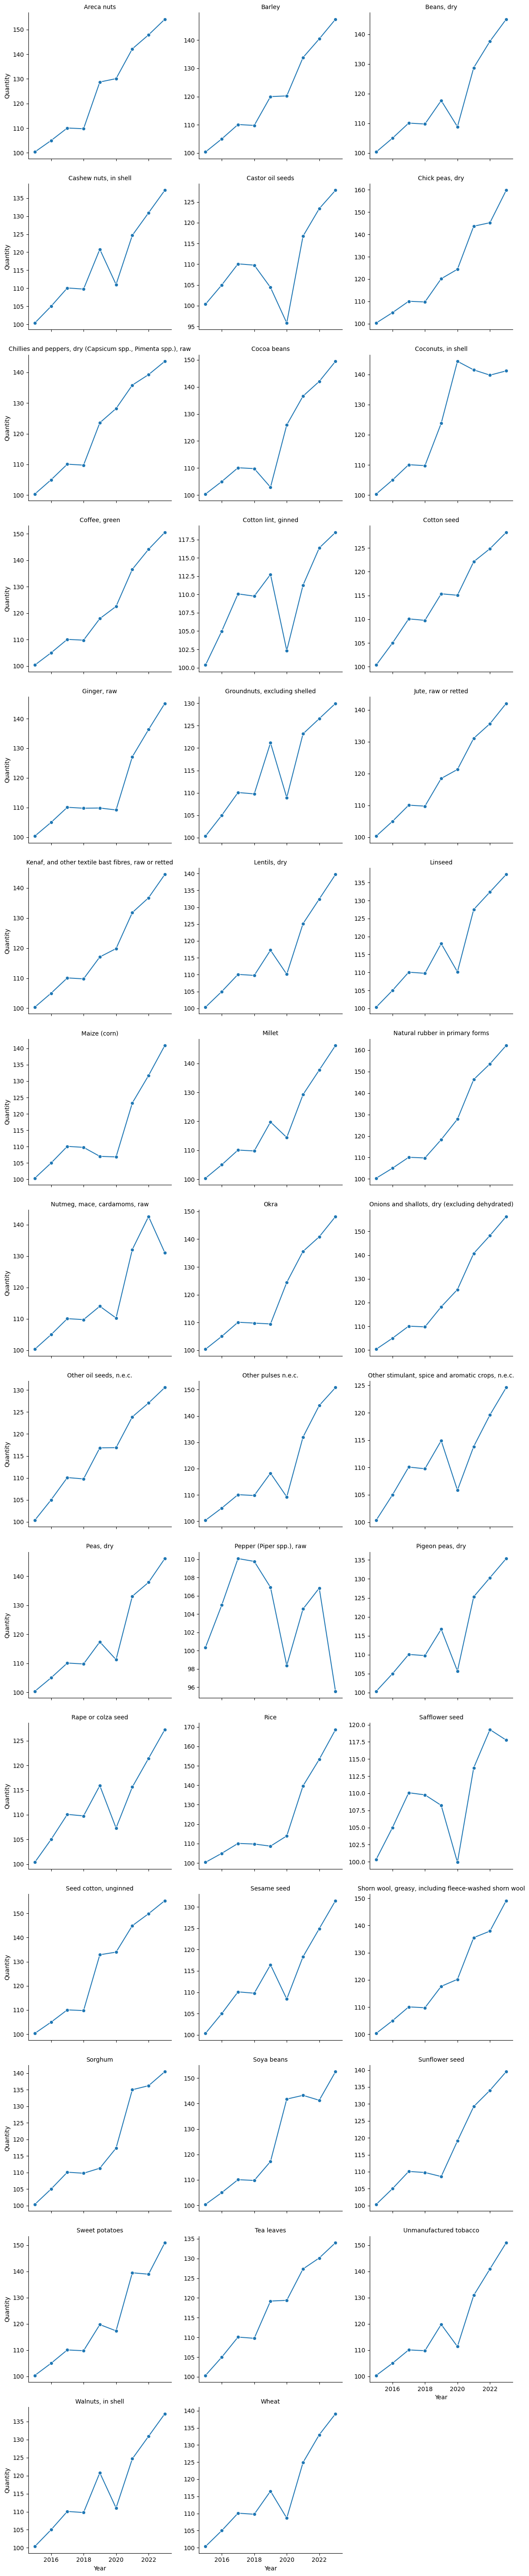

In [ ]:
import seaborn as sns

# Create a FacetGrid for line plots
g = sns.FacetGrid(data, col='Item', col_wrap=3, height=4, sharey=False)
g.map(sns.lineplot, 'Year', 'Value', marker='o')

# Customize the appearance
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Year", "Quantity")
g.add_legend()

# Adjust the layout
plt.tight_layout()
plt.show()